In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import skew, kurtosis
from scipy.stats import describe
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import scipy.linalg
import pprint as pprint
import time as time
from sklearn.decomposition import PCA

In [2]:
sigma= .15
r = 0.05
t = 25/252

# returns = np.random.normal(r, sigma, t)

# geomean= gmean(returns)

In [3]:
#Build Functions and test
from scipy.stats import skew, kurtosis, norm

def simulate_brownian_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 + simR
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1

def simulate_arithmetic_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 * (1+ simR)
    # Remove NaN and infinite values from P1
    P1 = P1[np.isfinite(P1)]
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1

def simulate_geometric_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 * np.exp(simR)
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1

simulate_geometric_motion(100, .15, n = 1000000)





expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(101.1081728325931, 15.278725401435896, 0.45496743053992783, 0.36929856203185096)


In [13]:
#check they produce outputs
simulate_arithmetic_motion(100,.15,100000)
brownian = simulate_brownian_motion(100,.15,100000)
geometric = simulate_geometric_motion(100,.15,100000)

expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(100.06002077093103, 14.983510785807011, 0.0019444335326469317, 0.0006248949464322529)
expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(99.99972412052355, 0.15017224982664232, 0.00447894130527005, 0.006221809214538965)
expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(101.12066792464506, 15.30195281361466, 0.45265160434727675, 0.35095549048585495)


expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(100.00024771497408, 0.14974409912643902, 0.006651486466406263, 0.017774727918742794)


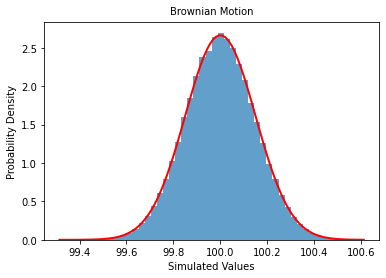

In [38]:
# Individually run outputs
def simulate_brownian_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 + simR
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1
# Call the function to simulate Brownian motion
P1 = simulate_brownian_motion(100, .15,n=100000)

# Create a histogram of the simulated values
plt.hist(P1, bins=50, density=True, alpha=0.7)

# Add a normal distribution with the same mean and standard deviation as the simulated values
x = np.linspace(P1.min(), P1.max(), 100)
y = norm.pdf(x, np.mean(P1), np.std(P1))
plt.plot(x, y, 'r', linewidth=2)

# Add labels for the x and y axis
plt.xlabel('Simulated Values')
plt.ylabel('Probability Density')

# Add a label to the top x-axis
plt.text(0.5, 1.05, 'Brownian Motion', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()


expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(99.98362968170497, 14.996087161376876, 0.006499202612322454, 0.03429523990861849)


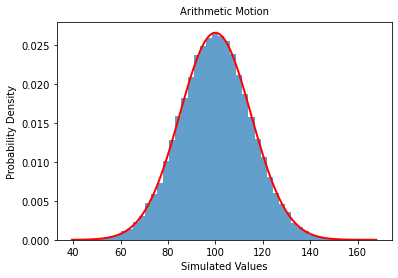

In [39]:

def simulate_arithmetic_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 * (1+ simR)
    # Remove NaN and infinite values from P1
    P1 = P1[np.isfinite(P1)]
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1

# Call the function to simulate arithmetic motion
P1 = simulate_arithmetic_motion(100, 0.15,n=100000)

# Create a histogram of the simulated values
plt.hist(P1, bins=50, density=True, alpha=0.7)

# Add a normal distribution with the same mean and standard deviation as the simulated values
x = np.linspace(P1.min(), P1.max(), 100)
y = norm.pdf(x, np.mean(P1), np.std(P1))
plt.plot(x, y, 'r', linewidth=2)

# Add labels for the x and y axis
plt.xlabel('Simulated Values')
plt.ylabel('Probability Density')

# Add a label to the top x-axis
plt.text(0.5, 1.05, 'Arithmetic Motion', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Show the plot
plt.show()


expect (u, sigma, skew, kurt) = (100, 0.15, 0, 0)
(101.12602194523096, 15.272822095465195, 0.46240926002272137, 0.3790177996678814)


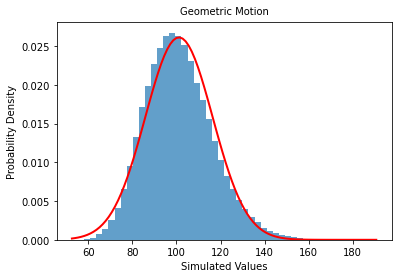

In [40]:
def simulate_geometric_motion(P0, sigma, n=1000000):
    rdist = norm(0, sigma)
    simR = rdist.rvs(n)
    P1 = P0 * np.exp(simR)
    mean_P1 = np.mean(P1)
    std_P1 = np.std(P1)
    skewness_P1 = skew(P1)
    kurtosis_P1 = kurtosis(P1)
    print(f"expect (u, sigma, skew, kurt) = ({P0}, {sigma}, 0, 0)")
    print(f"({mean_P1}, {std_P1}, {skewness_P1}, {kurtosis_P1})")
    return P1



P1 = simulate_geometric_motion(100, 0.15, 100000)

# Create a histogram of the simulated values
plt.hist(P1, bins=50, density=True, alpha=0.7)

# Add a normal distribution with the same mean and standard deviation as the simulated values
x = np.linspace(P1.min(), P1.max(), 100)
y = norm.pdf(x, np.mean(P1), np.std(P1))
plt.plot(x, y, 'r', linewidth=2)

# Add labels for the x and y axis
plt.xlabel('Simulated Values')
plt.ylabel('Probability Density')

# Add a label to the top x-axis
plt.text(0.5, 1.05, 'Geometric Motion', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [2]:
DailyPricesAritmetic = pd.read_csv("DailyPrices.csv")
DailyPricesGeo = pd.read_csv("DailyPrices.csv")
DailyPricesClassicBrownian = pd.read_csv("DailyPrices.csv")
#Calculate Geometric Brownian Returns from Daily Prices


In [165]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
dailyPricesGeo = pd.read_csv('DailyPrices.csv')

#drop first column
dailyPricesGeo = dailyPricesGeo.drop(dailyPricesGeo.columns[0], axis=1)
dailyPricesGeo.head()

dailyLogReturns = np.log(dailyPricesGeo / dailyPricesGeo.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

geometricReturns = geometricReturns.dropna()

# Print out the geometric daily returns for each stock
geometricReturns.head()


,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,2.315237e-02,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.017266,2.173132e-02,0.017353,0.018905,0.054387,0.016322,0.016168,-0.005328,0.092471,0.004359,...,0.019651,-0.006501,0.010381,0.093259,0.012927,-0.000181,0.036494,0.041942,0.027143,-0.013090
3,-0.004464,2.220446e-16,-0.012437,-0.003316,0.000674,-0.022040,-0.022110,-0.045889,0.009890,-0.002323,...,-0.015985,-0.001210,0.025554,0.041889,0.002946,0.004651,0.004512,0.008678,-0.007143,-0.041477
4,-0.010911,-9.355810e-03,-0.021948,-0.016534,-0.021444,-0.037801,-0.035717,-0.053009,-0.025755,0.001655,...,-0.016620,-0.002117,0.032941,0.041434,-0.000982,-0.001318,-0.009223,0.004132,-0.010794,-0.027063
5,-0.021525,-2.700144e-02,-0.022661,-0.032027,-0.061923,-0.042151,-0.043588,-0.071750,-0.036140,-0.000382,...,-0.007284,0.004989,0.023757,0.044811,-0.002127,-0.001990,-0.000958,-0.033678,-0.013016,-0.040300


In [77]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
stockPrices = pd.read_csv('Daily.csv')

# Calculate the daily log returns for each stock
dailyLogReturns = np.log(stockPrices / stockPrices.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

# Print out the geometric daily returns for each stock
print(geometricReturns)


FileNotFoundError: [Errno 2] No such file or directory: 'Daily.csv'

In [23]:
#calculate DailyReturns using Classical brownian motion formula 


# fix data set and drop dates 
DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices = DailyPrices.drop(DailyPrices.columns[0], axis=1)

#calculate returns
def calculateReturns(dailyReturns, methodOfCalculation="Arithmetic"):
    if methodOfCalculation == "Arithmetic":
        dailyReturns = dailyReturns.pct_change()
        dailyReturns = dailyReturns.dropna()
        return dailyReturns
    elif methodOfCalculation == "Geometric":
        dailyGeoReturns = np.log(dailyReturns / dailyReturns.shift(1))
        geometricReturns = np.exp(dailyGeoReturns.cumsum()) - 1
        geometricReturns = geometricReturns.dropna()
        return geometricReturns
    else:
        print("Invalid method of calculation. Please choose either 'Arithmetic' or 'Geometric'.")


DailyReturnsAritmetic = calculateReturns(DailyPrices, methodOfCalculation= "Arithmetic")
DailyReturnsGeo = calculateReturns(DailyPrices, methodOfCalculation= "Geometric")


In [39]:
import statistics
# Remove the mean from the DailyReturnsArithmetic so that the mean(META)=0
DailyReturns_META = DailyReturnsAritmetic['META']
DailyReturns_META_Mean =DailyReturns_META.mean()
DailyReturns_META_MeansRemoved = DailyReturns_META - DailyReturns_META_Mean

DailyReturns_META_MeansRemoved= DailyReturns_META_MeansRemoved.dropna()

sigma = statistics.stdev(DailyReturns_META_MeansRemoved)
sigma







0.039882922468254534

In [5]:
from scipy.stats import norm
# Calculate VaR using normal distribution with parameters alpha = .05, std dev, mean,d
import numpy as np
from scipy.stats import norm

def calculate_Normal_VaR(DailyReturns_META_MeansRemoved, alpha):
    # Calculate the mean and standard deviation of the returns
    mu = np.mean(DailyReturns_META_MeansRemoved)
    sigma = np.std(DailyReturns_META_MeansRemoved)
    
    # Calculate the alpha-percentile VaR using the normal distribution
    VaR = -(norm.ppf(alpha) * sigma - mu)*100
    
    return VaR

VaR_5_percent = calculate_Normal_VaR(DailyReturns_META_MeansRemoved,.05)

VaR_5_percent


6.5469174848811225

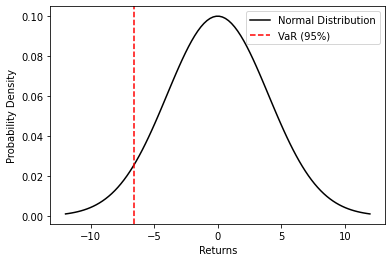

In [8]:

# create an x-axis array for the normal distribution plot

mu = DailyReturns_META_MeansRemoved.mean() *100
sigma = DailyReturns_META_MeansRemoved.std()*100

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()



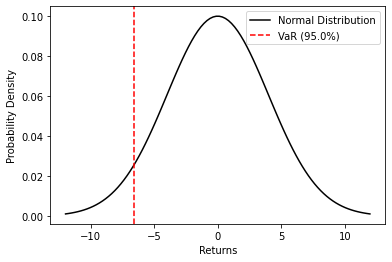

(6.5469174848811225, None)


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def calculate_Normal_VaR(DailyReturnsMeansAdj, alpha):
    # Calculate the mean and standard deviation of the returns
    mu = np.mean(DailyReturnsMeansAdj)
    sigma = np.std(DailyReturnsMeansAdj)
    
    # Calculate the alpha-percentile VaR using the normal distribution
    VaR = -(norm.ppf(alpha) * sigma - mu)*100

    def plot_normal_distribution_with_var(DailyReturnsMeansAdj, alpha):
        """
        Plots the normal distribution of the given data along with the Value at Risk (VaR) calculated
        using the specified alpha level.

        Args:
        DailyReturnsMeansAdj (pandas.DataFrame): A pandas DataFrame containing the data.
        alpha (float): The significance level for which to calculate VaR.

        Returns:
        None
        """
        # Calculate mean and standard deviation of daily returns
        mu = DailyReturnsMeansAdj.mean() * 100
        sigma = DailyReturnsMeansAdj.std() * 100

        # Generate x values for plotting the normal distribution
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

        # Calculate VaR using the inverse cumulative distribution function (ppf) of the normal distribution
        VaR = -norm.ppf(alpha, loc=mu, scale=sigma)

        # Plot the normal distribution
        plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

        # Plot the VaR on the normal distribution plot
        plt.axvline(x=-VaR, color='red', linestyle='--', label=f'VaR ({100*(1-alpha)}%)')

        # Add a legend and axis labels
        plt.legend()
        plt.xlabel('Returns')
        plt.ylabel('Probability Density')

        # Show the plot
        plt.show()
    
    return VaR, plot_normal_distribution_with_var(DailyReturnsMeansAdj, alpha)


# def plot_normal_distribution_with_var(data, alpha):
#     """
#     Plots the normal distribution of the given data along with the Value at Risk (VaR) calculated
#     using the specified alpha level.

#     Args:
#     data (pandas.DataFrame): A pandas DataFrame containing the data.
#     alpha (float): The significance level for which to calculate VaR.

#     Returns:
#     None
#     """
#     # Calculate mean and standard deviation of daily returns
#     mu = data.mean() * 100
#     sigma = data.std() * 100

#     # Generate x values for plotting the normal distribution
#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

#     # Calculate VaR using the inverse cumulative distribution function (ppf) of the normal distribution
#     VaR = norm.ppf(alpha, loc=mu, scale=sigma)

#     # Plot the normal distribution
#     plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

#     # Plot the VaR on the normal distribution plot
#     plt.axvline(x=-VaR, color='red', linestyle='--', label=f'VaR ({100*(1-alpha)}%)')

#     # Add a legend and axis labels
#     plt.legend()
#     plt.xlabel('Returns')
#     plt.ylabel('Probability Density')

#     # Show the plot
#     plt.show()

normVaR = calculate_Normal_VaR(DailyReturns_META_MeansRemoved, alpha=.05)
print(normVaR)

In [147]:
# #manually fix data so it can read most recent data first
# DailyReturns_META_MeansRemoved.to_csv("DailyReturns_META_MeansRemoved.csv")

In [150]:
# DailyReturns_META_MeansRemoved = pd.read_csv("DailyReturns_META_MeansRemoved.csv")


In [54]:
# def Cal_weight(lamda,n):
#     w=np.zeros(n)
#     total_w=0
#     for i in range(n):
#         tmp=(1-lamda)*pow(lamda,i-1)
#         w[i]=tmp
#         total_w+=tmp

#     w=w/total_w
#     return w

In [6]:


def calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved, alpha= .05, lam = .94):
    #First fix data so that the data frame gets inverted so that it can weight newest data point first
   


    #Calculate the exponentially weighted variance, Using adjust = true since it will weight the front
    Exponentially_Weighted_Variance = DailyReturns_META_MeansRemoved.ewm(alpha= 1-lam,adjust='False').var()

    Exponentially_Weighted_Variance = Exponentially_Weighted_Variance.dropna()
    sigma = np.sqrt(Exponentially_Weighted_Variance)

    mu = np.mean(DailyReturns_META_MeansRemoved)

    #calc VaR
    VaR = -(norm.ppf(alpha) * sigma - mu)*100

    return VaR


#return the vector of values
VaR_5_percent_EW = calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved,alpha = .05, lam = .94)

#Since VaR is min Loss on normal bad day, you calculate min of the vector 


VaR_5_percent_EW

min_loss = min(VaR_5_percent_EW)
min_loss

2.880074798798842

In [24]:
DailyReturnsAritmetic.type


AttributeError: 'DataFrame' object has no attribute 'type'

In [25]:
metaReturns = DailyReturnsAritmetic['META'].to_numpy()

metaReturns.shape


(248,)

In [44]:
# metaReturns = DailyReturnsAritmetic['META']

def calcExpWeightCovarVaROneStock(StockReturn, alpha =.05, lam = .94):
    StockReturnReshaped = np.reshape(StockReturn, (len(StockReturn), 1))
    def ewCovar(StockReturnReshaped, lam):
        m, n = StockReturnReshaped.shape
        w = np.zeros(m)

        # Remove the mean from the series
        StockReturnReshapedmean = np.mean(StockReturnReshaped, axis=0)
        StockReturnReshaped = StockReturnReshaped - StockReturnReshapedmean

        # Calculate weight. Realize we are going from oldest to newest
        for i in range(m):
            w[i] = (1 - lam) * lam**(m-i-1)

        # Normalize weights to 1
        w = w / np.sum(w)

        #covariance[i,j] = (w # x)' * x  where # is elementwise multiplication.
        return np.dot(StockReturnReshaped.T, w[:, None] * StockReturnReshaped)

    # Calculate the exponentially weighted covariance matrix
    ewCovarMatrix = ewCovar(StockReturnReshaped, lam)
    normal = norm(0,np.sqrt(ewCovarMatrix))
    VaR = -normal.ppf(alpha)*100


    return VaR


EWConeStock = calcExpWeightCovarVaROneStock(metaReturns)

VaR_5_percent_EW = EWConeStock.item()

VaR_5_percent_EW

9.138526093846897

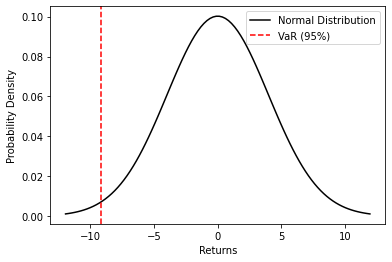

In [38]:
mu_EW = np.mean(DailyReturns_META_MeansRemoved)*100
sigma_EW = np.std(DailyReturns_META_MeansRemoved)*100

x = np.linspace(mu_EW - 3*sigma_EW, mu_EW + 3*sigma_EW, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu_EW, sigma_EW), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent_EW, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()

In [19]:
#Carry over log likelihood t 
from scipy.stats import t


# def log_likelihood_t(params, residuals):
#     df = len(residuals) - 1
#     loglik = -np.sum(t.logpdf(residuals, df, mu, sigma))
#     return loglik

# mu_MLE_T_Dist = np.mean(DailyReturns_META_MeansRemoved)
# sigma_MLE_T_Dist = np.std(DailyReturns_META_MeansRemoved)

# params = t.fit(DailyReturns_META_MeansRemoved)
# Degree_freedom = params[0]
# loc = params[1]
# scale = params[2]

# loglik = log_likelihood_t(params,DailyReturns_META_MeansRemoved)
# print(loglik)


def calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    params = t.fit(DailyReturns_META_MeansRemoved)
    Degree_freedom = params[0]
    loc = params[1]
    scale = params[2]

    sigma = np.std(DailyReturns_META_MeansRemoved)
    mu = np.mean(DailyReturns_META_MeansRemoved)

    VaR = -(t.ppf(alpha, Degree_freedom, loc, scale)* sigma - mu)*100
    return VaR

VaR_5_percent_MLE_T_Dist = calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05)

VaR_5_percent_MLE_T_Dist



0.22918101012447384

In [ ]:

# calculate the mean and standard deviation of the returns
mu = np.mean(DailyReturns_META_MeansRemoved)*100
sigma = np.std(DailyReturns_META_MeansRemoved)*100



# create an array of x-values for the normal distribution plot
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent_MLE_T_Dist, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()


In [50]:
#ARIMA

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ar1 = SARIMAX(DailyReturns_META_MeansRemoved, order=(1, 0, 0), trend='c')
# ar1_fitted = ar1.fit()

def ar1_simulation(y, coef_table, innovations):
    m = coef_table.loc[coef_table['names'] == 'mean', 'coef'].values[0]
    a1 = coef_table.loc[coef_table['names'] == 'ar_L1', 'coef'].values[0]
    s = np.sqrt(coef_table.loc[coef_table['names'] == 'sigma2_η', 'coef'].values[0])

    l = len(y)
    n = len(innovations)

    out = np.zeros(n)

    y_last = y[l-1] - m
    for i in range(n):
        out[i] = a1*y_last + innovations[i]*s + m
        y_last = out[i] - m

    return out


from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
def calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    model = ARIMA(DailyReturns_META_MeansRemoved, order=(1, 0, 0))
    model_fit = model.fit()
    residuals = model_fit.resid
    sigma = np.std(residuals)
    mu = np.mean(residuals)
    VaR = -(stats.norm.ppf(alpha)* sigma - mu)*100
    return VaR

# VaR_5_percent_ARIMA = calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05)
# VaR_5_percent_ARIMA

In [58]:
ar1 = SARIMAX(metaReturns, order=(1, 0, 0), trend='c')
ar1_fitted = ar1.fit()

# ar1_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  248
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 447.619
Date:                Sat, 25 Feb 2023   AIC                           -889.238
Time:                        22:13:48   BIC                           -878.697
Sample:                             0   HQIC                          -884.995
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.159e-05      0.003     -0.008      0.993      -0.005       0.005
ar.L1          0.0072      0.081      0.089      0.929      -0.152       0.167
sigma2         0.0016   6.67e-05     23.745      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1106.14
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.17
Prob(H) (two-sided):                  0.03   Kurtosis:                        13.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
ar1 = SARIMAX(metaReturns, order=(1, 0, 0), trend='c')
ar1_fitted = ar1.fit()

# Create a DataFrame with the coefficient values
# Create a DataFrame with the coefficient values
coef_data = {'names': ['mean', 'ar_L1', 'sigma2_η'], 
             'coef': [ar1_fitted.params[0], 
                      ar1_fitted.params[1],
                      ar1_fitted.params[2]]}

# Convert the dictionary to a DataFrame
ar1_coef = pd.DataFrame(coef_data)

# Print the DataFrame
innovations = np.random.randn(100)
simulation = ar1_simulation(metaReturns, ar1_coef, innovations)

# Sort the simulated returns in ascending order
sorted_returns = np.sort(simulation)

# Calculate the 5th percentile
percentile = 5
p = np.percentile(sorted_returns, percentile)

# Calculate the VaR
var_95 = -p
print(var_95)

# Print the DataFrame
# print(coef_df)


0.06645759323896117


In [90]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

def ar1_simulation(metaReturns, coef, innovations):
    '''
    Simulates an AR(1) process for a given set of innovations.

    Parameters:
        metaReturns (array): An array of the historical returns
        coef (DataFrame): A DataFrame containing the AR(1) coefficients
        innovations (array): An array of normally distributed innovations

    Returns:
        simulated_returns (array): An array of the simulated returns
    '''
    ar_coefficient = coef['ar_L1']
    mean = coef['mean']
    simulated_returns = np.zeros(len(innovations))

    # Set the initial value of the simulated return to the last historical return
    simulated_returns[0] = metaReturns[-1]

    for i in range(1, len(innovations)):
        simulated_returns[i] = mean + ar_coefficient * simulated_returns[i-1] + innovations[i]

    return simulated_returns

def ARIMA_VaR(data, order, trend, percentile):
    '''
    Computes the VaR using an ARIMA model.

    Parameters:
        data (array): An array of historical returns
        order (tuple): A tuple specifying the ARIMA(p, d, q) order
        trend (str): A string specifying the type of trend
        percentile (float): The percentile for the VaR calculation

    Returns:
        var (float): The VaR at the specified percentile
    '''
    # Fit the ARIMA model to the data
    ar_model = SARIMAX(data, order=order, trend=trend)
    ar_fitted = ar_model.fit()

    # Get the ARIMA coefficients
    mean_coef = ar_fitted.params[0]
    ar1_coef = ar_fitted.params[1]
    sigma2_coef = ar_fitted.params[2]

    # Simulate returns using the ARIMA coefficients and normally distributed innovations
    innovations = np.random.randn(100)
    simulated_returns = ar1_simulation(data, {'mean': mean_coef, 'ar_L1': ar1_coef}, innovations)

    # Sort the simulated returns in ascending order
    sorted_returns = np.sort(simulated_returns)

    # Calculate the VaR
    var = -np.percentile(sorted_returns, percentile)

    return var

# Calculate the VaR using an ARIMA(1, 0, 0) model
var_95 = ARIMA_VaR(metaReturns, order=(1, 0, 0), trend='c', percentile=5)

print(var_95)


1.6663732105409734


In [55]:
ar1 = SARIMAX(metaReturns, order=(1, 0, 0), trend='c')
ar1_fitted = ar1.fit()

import pandas as pd
import numpy as np

# Create a DataFrame with the coefficient values
# Create a DataFrame with the coefficient values
coef_data = {'names': ['mean', 'ar_L1', 'sigma2'], 
             'coef': [ar1_fitted.params['intercept'], 
                      ar1_fitted.params['ar.L1'],
                      ar1_fitted.params['sigma2']], 
             'stderr': [ar1_fitted.bse['intercept'], 
                        ar1_fitted.bse['ar.L1'], 
                        ar1_fitted.bse['sigma2']]}

coef_table = pd.DataFrame(data=coef_data)


# Call the ar1_simulation function with the appropriate inputs
innovations = np.random.randn(100)
simulation = ar1_simulation(metaReturns, coef_table, innovations)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:
def calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05):
    sorted_return = np.sort(DailyReturns_META_MeansRemoved)
    
    index = int(np.floor(alpha*len(DailyReturns_META_MeansRemoved)))
    #Calculate the VaR
    VaR = -sorted_return[index]*100
    return VaR

VaR_5_percent_Historical_Simulation = calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05)

VaR_5_percent_Historical_Simulation



5.590681367337082

In [118]:
# Problem 3

# import the data
portfolio = pd.read_csv("portfolio.csv")
portfolio = portfolio.set_index("Portfolio")
portfolio.head()



#


,Stock,Holding
Portfolio,,
A,AAPL,58
A,TSLA,10
A,JPM,64
A,HD,27
A,BAC,209


In [98]:
total_portfolio = pd.read_csv("portfolio.csv")

#drop columns so that it will only have Stock and Holding as columns
total_portfolio = total_portfolio.drop(columns = ['Portfolio'])
total_portfolio = total_portfolio.loc[:, ~total_portfolio.columns.str.contains('^Unnamed')]
total_portfolio.head()


#set index to Stock
# total_portfolio = total_portfolio.set_index("Stock")
# total_portfolio.head()



,Stock,Holding
0,AAPL,58
1,TSLA,10
2,JPM,64
3,HD,27
4,BAC,209


In [8]:
DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices.head()

# #index by date
DailyPrices = DailyPrices.set_index("Date")
DailyPrices.head()

#convert to datetime
DailyPrices.index = pd.to_datetime(DailyPrices.index)
DailyPrices.head()

#reset index
DailyPrices = DailyPrices.reset_index()
DailyPrices.head()

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2022-02-14,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2022-02-15,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2022-02-16,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2022-02-17,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2022-02-18,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [5]:
import pandas as pd

# Read portfolio.csv into a DataFrame
portfolio = pd.read_csv('portfolio.csv')

# Extract the A, B, and C portfolios into separate DataFrames
portfolio_A = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'A'])
portfolio_B = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'B'])
portfolio_C = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'C'])

# Create a new DataFrame for the Total portfolio
portfolio_Total = pd.concat([portfolio_A, portfolio_B, portfolio_C], ignore_index=True)
portfolio_Total['Portfolio'] = 'Total'

# Append the Total portfolio to the original DataFrame
portfolio = pd.concat([portfolio, portfolio_Total], ignore_index=True)

portfolio = portfolio.set_index("Portfolio")

# Write the modified DataFrame back to portfolio.csv
# portfolio.to_csv('portfolio.csv', index=False)

portfolio.tail()

,Stock,Holding
Portfolio,,
Total,F,397
Total,LRCX,14
Total,MO,197
Total,LMT,27
Total,TFC,149


In [6]:
#index by Portfolio
# if portfolio.empty:
#     print("The dataframe is empty!")
# else:
#     print(portfolio.head())

#get a list of assets in each portfolio and their holdings
portfolio_A = pd.DataFrame(portfolio[portfolio.index == 'A'])
portfolio_B = pd.DataFrame(portfolio[portfolio.index == 'B'])
portfolio_C = pd.DataFrame(portfolio[portfolio.index == 'C'])
portfolio_Total = pd.DataFrame(portfolio[portfolio.index == 'Total'])

#reset index for portfolio_A
# portfolio_A = portfolio_A.reset_index()
# portfolio_A.head()
# portfolio_B.head()
#set index by Portfolio




In [2]:
def GetCorrespondingStockPrices(port_df, daily_price_df):
    stocks = port_df['Stock'].unique()
    stock_dfs = {}
    for stock in stocks:
        stock_df = daily_price_df[['Date', stock]].copy()
        stock_df = stock_df.rename(columns={stock: 'Price'})
        stock_df = stock_df.set_index('Date')
        stock_dfs[stock] = stock_df
    return pd.concat(stock_dfs, axis=1)


In [9]:
stockPricesA = pd.DataFrame(GetCorrespondingStockPrices(portfolio_A, DailyPrices))

stockPricesB = pd.DataFrame(GetCorrespondingStockPrices(portfolio_B,DailyPrices))
stockPricesC = pd.DataFrame(GetCorrespondingStockPrices(portfolio_C,DailyPrices))
stockPricesTotal = pd.DataFrame(GetCorrespondingStockPrices(portfolio_Total,DailyPrices))
# # # 
# def VaRCalcDataCleanup
# stockPricesA_Copy = stockPricesA.to_numpy()
# portfolio_A = merge_price_data(stockPrices, portfolio_A)
# portfolio_A.head()

#reset stockpriceA index to date
# stockPricesA.print()
# stockPricesA.head()
# stockPricesA_Copy



In [10]:
stockPricesA

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-14,167.863144,291.920013,147.619888,342.932312,46.340988,76.808563,560.551880,162.356186,559.952576,46.047134,...,91.481377,75.086494,281.140015,89.170525,579.580017,198.207108,197.263107,151.118790,247.324020,66.789505
2022-02-15,171.749573,307.476654,149.778656,344.590576,46.702568,75.845779,583.988159,161.635452,555.442566,46.678581,...,92.321449,78.444397,289.309998,95.263412,591.659973,200.209030,199.789520,159.029022,255.490829,67.673614
2022-02-16,171.511032,307.796661,150.049713,341.498352,46.595070,76.195877,578.601440,161.966614,549.136475,46.717442,...,92.975937,78.825272,291.140015,95.322952,590.890015,200.424912,201.139511,165.211960,256.349976,65.915215
2022-02-17,167.863144,292.116669,146.593735,339.401123,45.021709,76.079193,560.958801,162.404877,539.348022,45.435116,...,90.895264,76.532257,284.079987,93.010841,565.750000,196.715530,194.109894,157.448944,248.439911,64.019295
2022-02-18,166.292648,285.660004,147.281052,338.357391,44.914211,75.233109,561.917969,163.339874,535.955688,45.308826,...,91.178543,72.047279,280.779999,90.103310,556.010010,196.705719,193.984528,157.380234,245.042847,64.981995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,154.264465,189.979996,141.089996,331.500000,36.430000,111.919998,597.619995,169.119995,587.760010,39.970001,...,103.779976,81.959999,254.679993,62.410000,472.220001,225.309998,165.389999,178.820007,283.140015,80.222557
2023-02-06,151.498688,194.759995,141.919998,329.269989,36.369999,111.730003,601.299988,171.820007,576.169983,39.509998,...,104.496384,82.349998,248.979996,59.980000,455.220001,223.470001,163.000000,177.550003,271.480011,79.853935


In [133]:
stock_Ret_Matrix_A= calculateReturns(stockPricesA, methodOfCalculation= "Arithmetic")




mean_returns_port_A = stock_Ret_Matrix_A.mean()

stock_Ret_Matrix_A_Mean_Adj = stock_Ret_Matrix_A -mean_returns_port_A

stock_Ret_Matrix_A_Mean_Adj


def CalcReturnsAndAdjustForMean(stockPrices):
    stock_Ret_Matrix= calculateReturns(stockPrices, methodOfCalculation= "Arithmetic")
    mean_returns_port = stock_Ret_Matrix.mean()
    stock_Ret_Matrix_Mean_Adj = stock_Ret_Matrix -mean_returns_port
    return stock_Ret_Matrix_Mean_Adj

#drop date

stock_Ret_Matrix_B= calculateReturns(stockPricesB, methodOfCalculation= "Arithmetic")
# stock_Ret_Matrix_B.head()



mean_returns_port_B = stock_Ret_Matrix_B.mean()
mean_returns_port_B
stock_Ret_Matrix_B_Mean_Adj = stock_Ret_Matrix_B -mean_returns_port_B
#get what is indexed by
# stock_Ret_Matrix_B_Mean_Adj.head()

#drop date
stock_Ret_Matrix_C= calculateReturns(stockPricesC, methodOfCalculation= "Arithmetic")
# stock_Ret_Matrix_C.head()



mean_returns_port_C = stock_Ret_Matrix_C.mean()
# mean_returns_port_C.head()
stock_Ret_Matrix_C_Mean_Adj = stock_Ret_Matrix_C -mean_returns_port_C
#get what is indexed by
# stock_Ret_Matrix_C_Mean_Adj.head()


# #drop date
stock_Ret_Matrix_Total= calculateReturns(stockPricesTotal, methodOfCalculation= "Arithmetic")
# stock_Ret_Matrix_Total.head()



mean_returns_port_Total = stock_Ret_Matrix_Total.mean()
mean_returns_port_Total
stock_Ret_Matrix_Total_Mean_Adj = stock_Ret_Matrix_Total -mean_returns_port_Total
#get what is indexed by
stock_Ret_Matrix_Total_Mean_Adj.head()



,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,IBM,PLD,TGT,DE,MMM,F,LRCX,MO,LMT,TFC
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,0.023338,0.053757,0.014662,0.004978,0.008653,-0.014379,0.041282,-0.004767,-0.008324,0.014311,...,-0.002028,0.002097,-0.002111,0.015345,-0.003220,0.036004,0.063432,0.004456,-0.013301,0.029295
2022-02-16,-0.001203,0.001507,0.001848,-0.008831,-0.001451,0.002772,-0.009751,0.001721,-0.011623,0.001431,...,-0.006264,-0.008344,0.003289,-0.007729,-0.009848,-0.003378,-0.004243,0.005628,0.011219,-0.000665
2022-02-17,-0.021083,-0.050476,-0.022994,-0.005999,-0.032916,-0.003375,-0.031019,0.002378,-0.018095,-0.026850,...,-0.033005,-0.007448,-0.018085,-0.026191,-0.034661,-0.025603,-0.018647,0.014881,0.003808,-0.032656
2022-02-18,-0.009170,-0.021637,0.004727,-0.002932,-0.001537,-0.012965,0.001183,0.005429,-0.006560,-0.002181,...,-0.005376,-0.004924,0.002160,-0.030547,-0.005842,0.029000,-0.018577,0.007067,-0.006967,-0.002953
2022-02-22,-0.017626,-0.040900,-0.001736,-0.088363,-0.007853,-0.013478,-0.004889,0.003488,-0.013768,0.007030,...,-0.003873,-0.001092,-0.039088,-0.042016,-0.004873,-0.041081,-0.018303,-0.009026,-0.001698,-0.001523


In [108]:
def CalcReturnsAndAdjustForMean(portfolio,PriceData):
    stockPrices = pd.DataFrame(GetCorrespondingStockPrices(portfolio, PriceData))
    stock_Ret_Matrix= calculateReturns(stockPrices, methodOfCalculation= "Arithmetic")
    mean_returns_port = stock_Ret_Matrix.mean()
    stock_Ret_Matrix_Mean_Adj = stock_Ret_Matrix -mean_returns_port
    return stock_Ret_Matrix_Mean_Adj

stockAdjustedPortA = CalcReturnsAndAdjustForMean(portfolio_A,DailyPrices)



In [378]:
# #Sanity check to understand how weights are being generated, understand whether you need to invert since most recent data is at bottom

# lam = .75


# weight = np.zeros(len(stock_returns_matrix_port_A))

# for i in range(len(stock_returns_matrix_port_A)):
#     weight[len(stock_returns_matrix_port_A)-1-i]  = (1-lam)*lam**i
# weight = weight/sum(weight)


# weight = pd.DataFrame(weight)
# weight.tail()


,0
243,0.079102
244,0.105469
245,0.140625
246,0.187500
247,0.250000


In [134]:
def exponentially_weighted_covar_matrix(stock_returns_matrix_port_A,lam = .94):
    weight = np.zeros(len(stock_returns_matrix_port_A))
    for i in range(len(stock_returns_matrix_port_A)):
        weight[len(stock_returns_matrix_port_A)-1-i]  = (1-lam)*lam**i
    weight = weight/sum(weight)
    ret_means = stock_returns_matrix_port_A - stock_returns_matrix_port_A.mean()
    #print(ret_means.T.values.shape)
    #print(np.diag(weight).shape)
    #print(ret_means.values.shape)
    expo_w_cov = ret_means.T.values @ np.diag(weight) @ ret_means.values
    return expo_w_cov
    



In [135]:

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_A = exponentially_weighted_covar_matrix(stock_Ret_Matrix_A_Mean_Adj,lam = .94)
# expo_w_cov_port_A = pd.DataFrame(expo_w_cov_port_A, columns = stock_Ret_Matrix_A_Mean_Adj.columns, index = stock_Ret_Matrix_A_Mean_Adj.columns)
# expo_w_cov_port_A

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_B = exponentially_weighted_covar_matrix(stock_Ret_Matrix_B_Mean_Adj, lam = .94)
# expo_w_cov_port_B = pd.DataFrame(expo_w_cov_port_B, columns = stock_Ret_Matrix_B_Mean_Adj.columns, index = stock_Ret_Matrix_B_Mean_Adj.columns)
# expo_w_cov_port_B

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_C = exponentially_weighted_covar_matrix(stock_Ret_Matrix_C_Mean_Adj, lam = .94)
# expo_w_cov_port_C = pd.DataFrame(expo_w_cov_port_C, columns = stock_Ret_Matrix_C_Mean_Adj.columns, index = stock_Ret_Matrix_C.columns)
# expo_w_cov_port_C

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_Total = exponentially_weighted_covar_matrix(stock_Ret_Matrix_Total_Mean_Adj, lam = .94)
# expo_w_cov_port_Total = pd.DataFrame(expo_w_cov_port_Total, columns = stock_Ret_Matrix_Total_Mean_Adj.columns, index = stock_Ret_Matrix_Total_Mean_Adj.columns)




In [136]:
#fix index of portfolio

portfolio_A = portfolio_A.reset_index()
portfolio_B = portfolio_B.reset_index()
portfolio_C = portfolio_C.reset_index()
portfolio_Total = portfolio_Total.reset_index()


In [137]:
import numpy as np
import pandas as pd
from scipy.stats import norm




def calculate_var(portfolio_df, prices_df, return_matrix, lam=0.94, alpha=0.05):
    holdings = portfolio_df['Holding'].values

    # get list of stocks and holdings for each portfolio
    portfolios = portfolio_df['Portfolio'].unique()
    portfolio_holdings = {}
    portfolio_returns = {}

    for portfolio_name in portfolios:
        stocks = list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])
        portfolio_holdings[portfolio_name] = holdings[portfolio_df['Portfolio'] == portfolio_name]

        portfolio_prices = prices_df[stocks].values
        portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

    cov_matrices = {}

    for portfolio_name, returns in portfolio_returns.items():
        cov_matrix = exponentially_weighted_covar_matrix(return_matrix, lam)
        cov_matrices[portfolio_name] = cov_matrix

    for portfolio_name, returns in portfolio_returns.items():
        portfolio_values = prices_df[list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * portfolio_holdings[portfolio_name]

        # Calculate portfolio expected return
        portfolio_expected_return = np.sum(portfolio_returns[portfolio_name] * portfolio_holdings[portfolio_name])

        # Calculate the standard deviation of the portfolio returns (sigma)
        sigma = np.sqrt(np.diag(cov_matrix))

        # Calculate VaR$
        portfolio_var = -norm.ppf(alpha) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrices[portfolio_name], portfolio_values)))
        print(f"Portfolio {portfolio_name} VaR$: ${portfolio_var:.2f}")

        # Calculate VaRret
        var_ret = portfolio_expected_return * norm.ppf(alpha)
        print(f"Portfolio {portfolio_name} VaRret: {var_ret:.2f}")




    
    
VaR_port_A_5 = calculate_var(portfolio_A, stockPricesA, stock_Ret_Matrix_A_Mean_Adj, lam = .94, alpha= .05 ) 
VaR_port_B_5 = calculate_var(portfolio_B, stockPricesB, stock_Ret_Matrix_B_Mean_Adj, lam = .94, alpha= .05 ) 
VaR_port_C_5 = calculate_var(portfolio_C, stockPricesC, stock_Ret_Matrix_C_Mean_Adj, lam = .94, alpha= .05 )
VaR_port_Total_5 = calculate_var(portfolio_Total, stockPricesTotal, stock_Ret_Matrix_Total_Mean_Adj, lam = .94, alpha= .05 )


Portfolio A VaR$: $5670.20
Portfolio A VaRret: 205.54
Portfolio B VaR$: $4494.60
Portfolio B VaRret: 14.90
Portfolio C VaR$: $3786.59
Portfolio C VaRret: 413.43
Portfolio Total VaR$: $13577.08
Portfolio Total VaRret: 633.87


In [106]:
#PCA simulation
import numpy as np
from numpy.linalg import eig

def simulate_pca(a, nsim, pctExp=1, mean=[], seed=1234):
    n = a.shape[0]

    #If the mean is missing then set to 0, otherwise use provided mean
    _mean = np.zeros(n)
    if len(mean) != 0:
        _mean = mean.copy()

    #Eigenvalue decomposition
    vals, vecs = eig(a)
    vals = np.real(vals)
    vecs = np.real(vecs)
    #julia returns values lowest to highest, flip them and the vectors
    flip = np.arange(vals.size - 1, -1, -1)
    vals = vals[flip]
    vecs = vecs[:,flip]

    tv = np.sum(vals)

    posv = np.where(vals >= 1e-8)[0]
    if pctExp < 1:
        nval = 0
        pct = 0.0
        #figure out how many factors we need for the requested percent explained
        for i in range(posv.size):
            pct += vals[i]/tv
            nval += 1
            if pct >= pctExp:
                break
        if nval < posv.size:
            posv = posv[:nval]
    vals = vals[posv]

    vecs = vecs[:,posv]

    # print(f"Simulating with {posv.size} PC Factors: {np.sum(vals)/tv*100}% total variance explained")
    B = vecs*np.diag(np.sqrt(vals))

    np.random.seed(seed)
    m = vals.size
    r = np.random.randn(m,nsim)

    out = np.dot(B, r).T
    #Loop over itereations and add the mean
    for i in range(n):
        out[:,i] = out[:,i] + _mean[i]
    return out



In [ ]:
nSim = 10000


In [177]:

def calculate_var_monte_carlo(portfolio_df, prices_df, return_matrix, lam=0.94, alpha=0.05, num_simulations=100000):
    holdings = portfolio_df['Holding'].values

    # get list of stocks and holdings for each portfolio
    portfolios = portfolio_df['Portfolio'].unique()
    portfolio_holdings = {}
    portfolio_returns = {}

    for portfolio_name in portfolios:
        stocks = list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])
        portfolio_holdings[portfolio_name] = holdings[portfolio_df['Portfolio'] == portfolio_name]

        portfolio_prices = prices_df[stocks].values
        portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

    cov_matrices = {}

    for portfolio_name, returns in portfolio_returns.items():
        cov_matrix = exponentially_weighted_covar_matrix(return_matrix, lam)
        cov_matrices[portfolio_name] = cov_matrix

    for portfolio_name, returns in portfolio_returns.items():
        portfolio_values = prices_df[list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * portfolio_holdings[portfolio_name]

        # Calculate portfolio expected return
        portfolio_expected_return = np.sum(portfolio_returns[portfolio_name] * portfolio_holdings[portfolio_name])

        # Calculate the standard deviation of the portfolio returns (sigma)
        sigma = np.sqrt(np.diag(cov_matrix))

        # Calculate VaR$ using Monte Carlo simulation
        portfolio_returns_mc = np.random.multivariate_normal(portfolio_returns[portfolio_name].mean(axis=0), cov_matrices[portfolio_name], size=num_simulations)
        portfolio_values_mc = np.dot(portfolio_returns_mc, portfolio_values)
        portfolio_var_mc = -np.percentile(portfolio_values_mc, 100 * alpha)
        print(f"Portfolio {portfolio_name} VaR$: ${portfolio_var_mc:.2f}")

        # Calculate VaRret
        var_ret = portfolio_var_mc/ sum(portfolio_values)
        print(f"Portfolio {portfolio_name} VaRret: {var_ret:.2f}")


calculate_var_monte_carlo(portfolio_A, stockPricesA,stock_Ret_Matrix_A_Mean_Adj, lam=0.94,alpha=0.05, num_simulations=100000)
calculate_var_monte_carlo(portfolio_B, stockPricesB,stock_Ret_Matrix_B_Mean_Adj, lam=0.94,alpha=0.05, num_simulations=100000)
calculate_var_monte_carlo(portfolio_C, stockPricesC,stock_Ret_Matrix_C_Mean_Adj, lam=0.94,alpha=0.05, num_simulations=100000)
calculate_var_monte_carlo(portfolio_Total, stockPricesTotal,stock_Ret_Matrix_Total_Mean_Adj, lam=0.94,alpha=0.05, num_simulations=100000)

Portfolio A VaR$: $5684.31
Portfolio A VaRret: 0.02
Portfolio B VaR$: $4496.70
Portfolio B VaRret: 0.02
Portfolio C VaR$: $3793.05
Portfolio C VaRret: 0.01
Portfolio Total VaR$: $13623.42
Portfolio Total VaRret: 0.02
